In [4]:
import albumentations as A
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [1]:
def plot_examples(images, bboxes=None):
    fig = plt.figure(figsize=(20, 20))
    columns = 6
    rows = 20
    for i in range(1, len(images)):
        img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

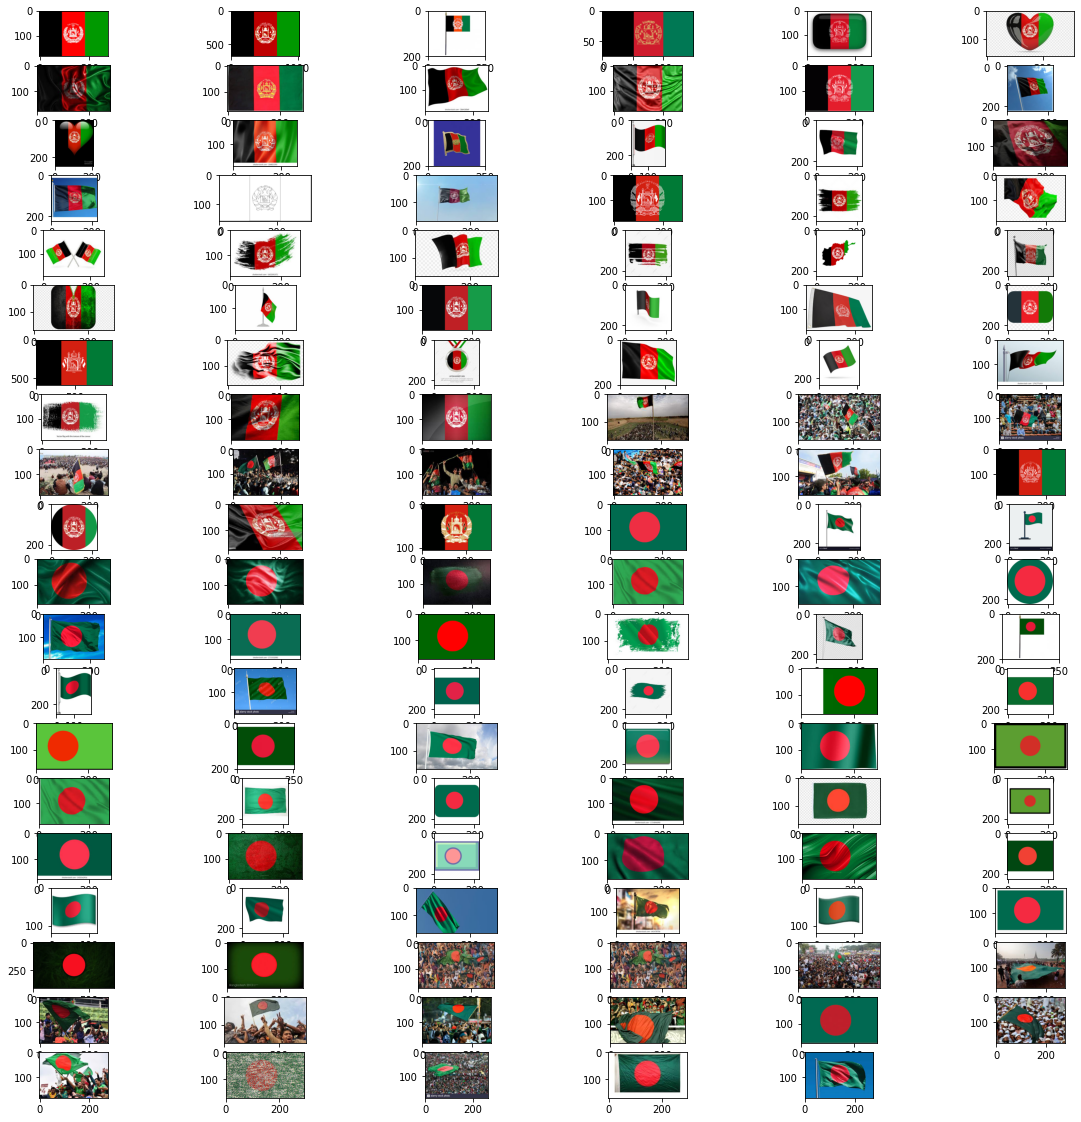

In [5]:
basepath = 'flags/'
collect = []
for entry in os.listdir(basepath):
    file = os.path.join(basepath, entry)
    if os.path.isfile(file):
        image = Image.open(file)
        collect.append(image)  
plot_examples(collect)


Applying transformations

In [10]:
transform = A.Compose(
    [
        A.VerticalFlip(p=0.6),
        A.HorizontalFlip(p=0.6),
        A.Rotate(limit=30, p=0.6),
        A.InvertImg(),
        A.Blur(blur_limit=3, p=0.5),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.01),
    ]
)

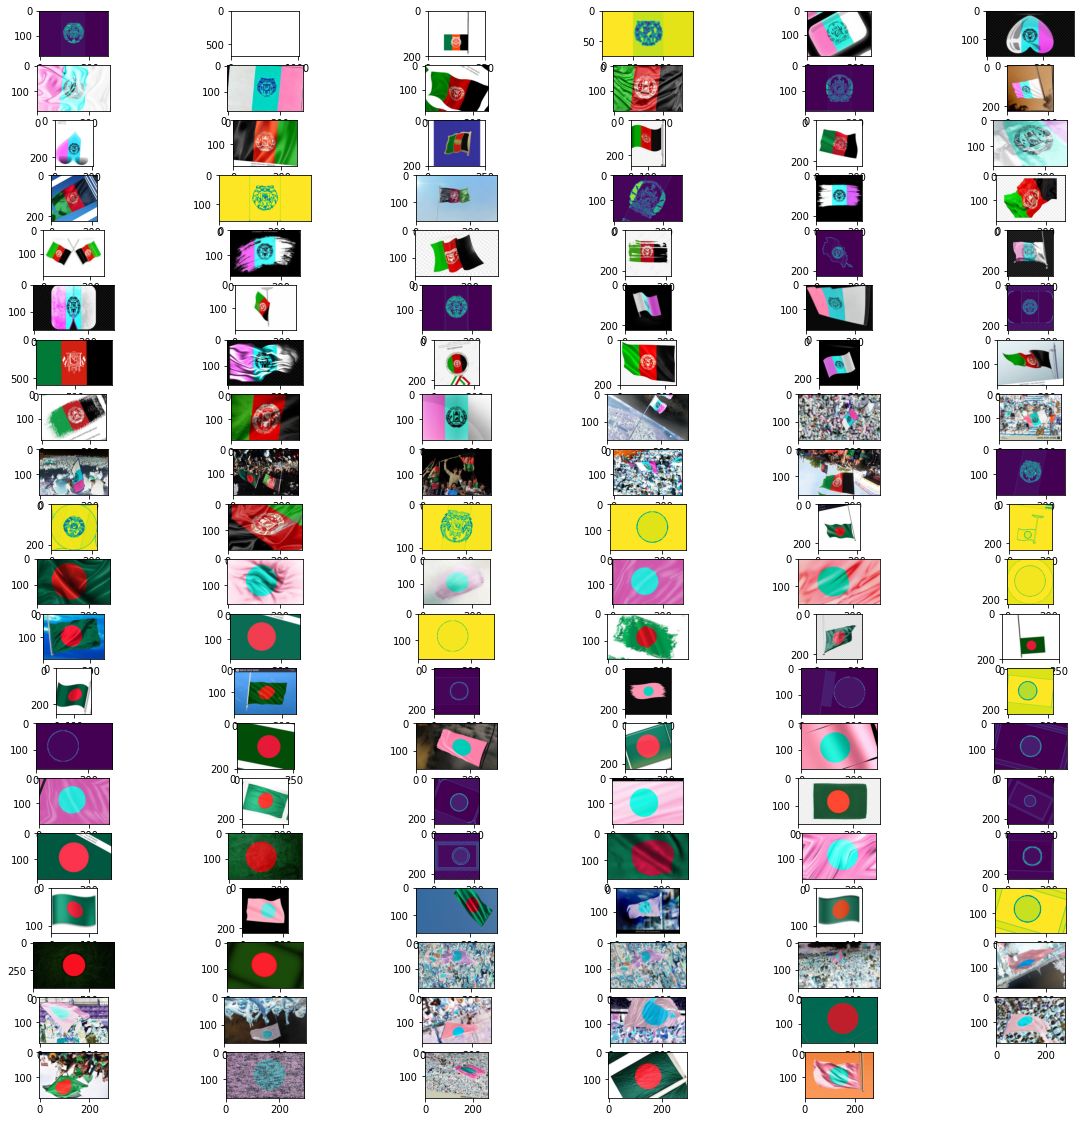

In [12]:
image_list = []
matrix = []
for x in collect:
    h = np.array(x)
    augmentations = transform(image=h)
    augmented_img = augmentations['image']
    image_list.append(augmented_img)

plot_examples(image_list)